## PyCaret: Anatomy of Classification

### Task 1: Import Data, Initial dataset check and setup Pycaret(install and set up environment)

In [1]:
import pandas as pd

In [2]:
#importing the data
df1 = pd.read_csv('bank.csv', sep=";")

In [3]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
#looking for any missing value in any feature
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
#including categorical feautres as well
df1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
#latest version of PyCaret
#! pip install pycaret==2.0

#### Lonk to Classification Documention of PyCaret https://pycaret.org/classification/

In [8]:
#becuase we are working on classification task
from pycaret.classification import *

In [9]:
#setting up the session
session_1 = setup(df1, target = 'y', session_id=123, log_experiment=False, normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile', experiment_name='bank_1')

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(4521, 17)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


### Task 2: Compare model performance

In [11]:
#comparing for best performing models, fold set to 4, by default it runs a 10 fold Cv.
best_model = compare_models(exclude=['catboost'], fold=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8973,0.8926,0.3431,0.6248,0.4424,0.3911,0.4127,0.2450
lr,Logistic Regression,0.8963,0.8852,0.3165,0.6292,0.4198,0.3698,0.3968,1.3625
ada,Ada Boost Classifier,0.8944,0.8750,0.3537,0.5934,0.4426,0.3885,0.4047,0.1150
lda,Linear Discriminant Analysis,0.8929,0.8785,0.3165,0.5890,0.4109,0.3581,0.3794,0.0375
lightgbm,Light Gradient Boosting Machine,0.8929,0.9056,0.3750,0.5740,0.4535,0.3971,0.4082,0.1625
xgboost,Extreme Gradient Boosting,0.8922,0.9004,0.3936,0.5656,0.4634,0.4059,0.4144,0.7200
rf,Random Forest Classifier,0.8910,0.8945,0.2154,0.6241,0.3201,0.2755,0.3224,0.2475
ridge,Ridge Classifier,0.8900,0.0000,0.1782,0.6439,0.2781,0.2384,0.2978,0.0200
svm,SVM - Linear Kernel,0.8869,0.0000,0.2633,0.5586,0.3487,0.2970,0.3258,0.0300
et,Extra Trees Classifier,0.8865,0.8539,0.1968,0.5695,0.2915,0.2453,0.2872,0.2375


In [12]:
#naming convention of all models for classification is shown here
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Task 3: Create best performing models

In [13]:
#light GBM Model
lgbm = create_model('lightgbm', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8812,0.8883,0.3298,0.5000,0.3974,0.3346,0.3435
1,0.8850,0.8907,0.3191,0.5263,0.3974,0.3380,0.3509
2,0.8900,0.8996,0.3723,0.5556,0.4459,0.3874,0.3970
3,0.9153,0.9439,0.4787,0.7143,0.5732,0.5283,0.5413
Mean,0.8929,0.9056,0.3750,0.5740,0.4535,0.3971,0.4082
SD,0.0133,0.0225,0.0631,0.0833,0.0719,0.0786,0.0795


In [14]:
#gradient boosting tree
gbc = create_model('gbc', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8875,0.8793,0.2979,0.5490,0.3862,0.3302,0.3490
1,0.8976,0.8826,0.3191,0.6383,0.4255,0.3761,0.4035
2,0.8938,0.8818,0.3617,0.5862,0.4474,0.3923,0.4063
3,0.9102,0.9268,0.3936,0.7255,0.5103,0.4657,0.4922
Mean,0.8973,0.8926,0.3431,0.6248,0.4424,0.3911,0.4127
SD,0.0083,0.0198,0.0371,0.0662,0.0450,0.0487,0.0512


In [15]:
#extreme gradient boosting 
xgboost = create_model('xgboost', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8837,0.8781,0.3830,0.5143,0.4390,0.3757,0.3808
1,0.8837,0.8826,0.3085,0.5179,0.3867,0.3269,0.3404
2,0.8938,0.9063,0.4149,0.5735,0.4815,0.4240,0.4309
3,0.9077,0.9345,0.4681,0.6567,0.5466,0.4968,0.5056
Mean,0.8922,0.9004,0.3936,0.5656,0.4634,0.4059,0.4144
SD,0.0098,0.0224,0.0578,0.0576,0.0586,0.0627,0.0617


### Task 4: Hyper Parameter tuning the model

In [16]:
#tuning
tuned_lgbm = tune_model(lgbm, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8837,0.8486,0.1383,0.5417,0.2203,0.1807,0.2311
1,0.8925,0.8659,0.1702,0.6957,0.2735,0.2379,0.3085
2,0.8976,0.8627,0.2447,0.6970,0.3622,0.3202,0.3728
3,0.8951,0.9173,0.1809,0.7391,0.2906,0.2558,0.3317
Mean,0.8922,0.8736,0.1835,0.6684,0.2867,0.2487,0.3110
SD,0.0052,0.0260,0.0386,0.0752,0.0507,0.0498,0.0516


In [17]:
#checking params
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Task 5: Stacking, Blending & Ensemble multiple models

In [18]:
stacked_lgbm = stack_models(estimator_list = [tuned_lgbm, xgboost, gbc],
                           meta_model=lgbm, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8812,0.8810,0.2979,0.5000,0.3733,0.3123,0.3251
1,0.8812,0.8827,0.3298,0.5000,0.3974,0.3346,0.3435
2,0.8925,0.9027,0.3830,0.5714,0.4586,0.4015,0.4114
3,0.9064,0.9251,0.3830,0.6923,0.4932,0.4463,0.4701
Mean,0.8903,0.8978,0.3484,0.5659,0.4306,0.3737,0.3875
SD,0.0104,0.0179,0.0364,0.0786,0.0476,0.0532,0.0575


In [19]:
en_mod = ensemble_model(lgbm, n_estimators = 10, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8862,0.8847,0.3085,0.5370,0.3919,0.3342,0.3498
1,0.8963,0.8968,0.2979,0.6364,0.4058,0.3571,0.3881
2,0.8951,0.9001,0.2872,0.6279,0.3942,0.3453,0.3772
3,0.9115,0.9435,0.3723,0.7609,0.5000,0.4576,0.4930
Mean,0.8973,0.9063,0.3165,0.6405,0.4230,0.3735,0.4020
SD,0.0091,0.0223,0.0331,0.0796,0.0448,0.0492,0.0543


In [20]:
blender = blend_models(estimator_list = [lgbm,gbc,xgboost, en_mod], method = 'soft', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8837,0.8880,0.3085,0.5179,0.3867,0.3269,0.3404
1,0.8925,0.8899,0.3191,0.5882,0.4138,0.3603,0.3808
2,0.8925,0.9014,0.3723,0.5738,0.4516,0.3950,0.4064
3,0.9153,0.9463,0.4043,0.7755,0.5315,0.4899,0.5215
Mean,0.8960,0.9064,0.3511,0.6138,0.4459,0.3931,0.4123
SD,0.0117,0.0236,0.0391,0.0970,0.0545,0.0609,0.0673


### Task 6: Visualize performance

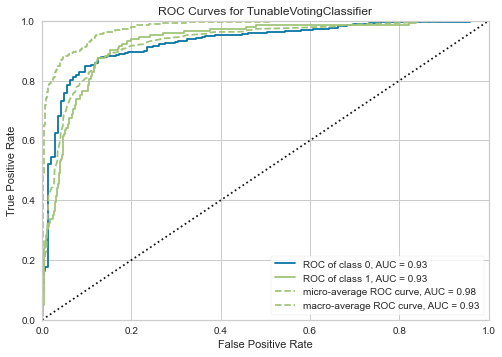

In [21]:
#AUC Plot
plot_model(blender)

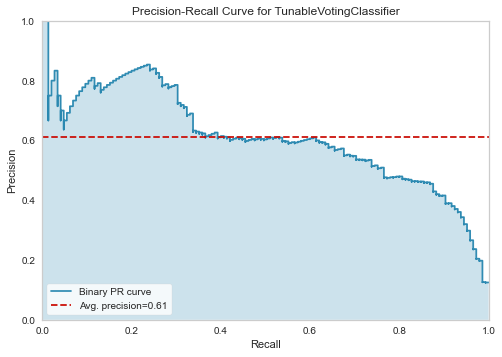

In [22]:
#precision recall plot
plot_model(blender, plot='pr')

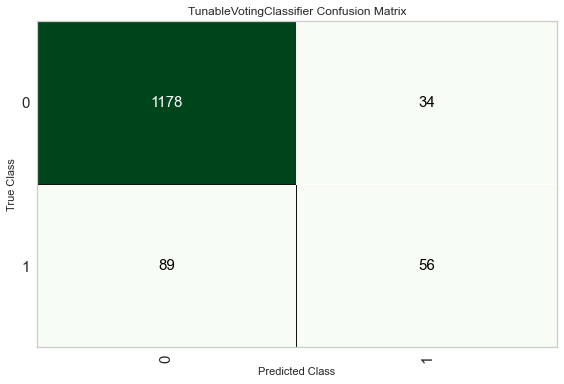

In [23]:
#confusion matrix
plot_model(blender, plot='confusion_matrix')

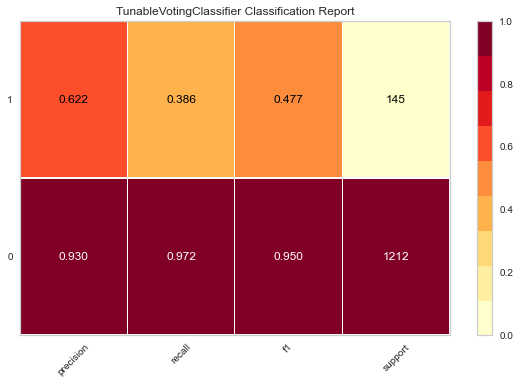

In [24]:
#classification report
plot_model(blender, plot='class_report')

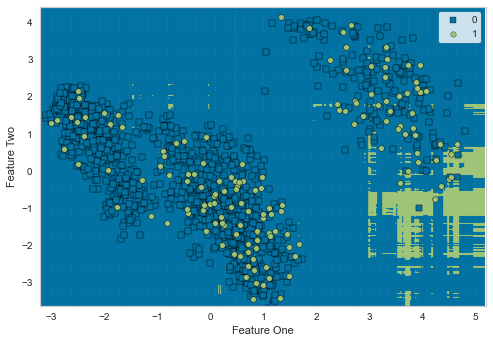

In [25]:
#visualizing decision boundary
plot_model(blender, plot='boundary')

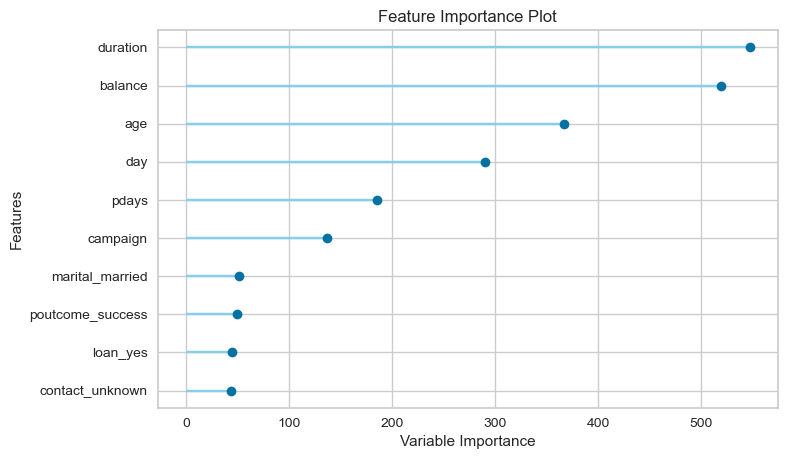

In [26]:
#feature importance by lgbm
plot_model(lgbm, plot='feature')

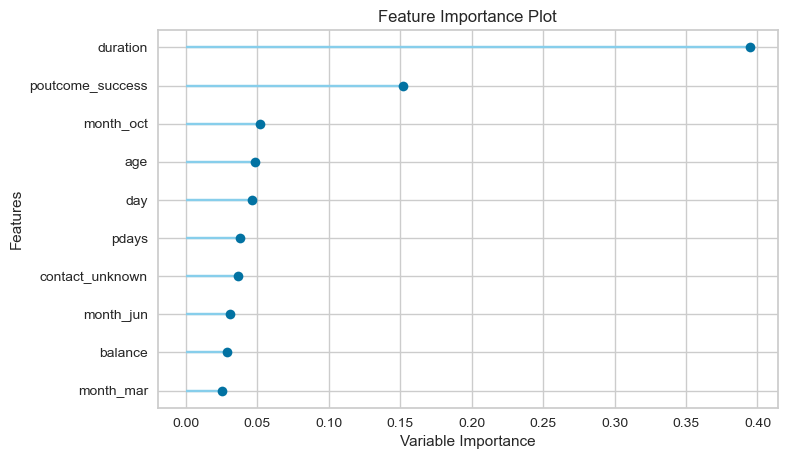

In [27]:
#feature importance by gbc
plot_model(gbc, plot='feature')

In [28]:
#pip install shap

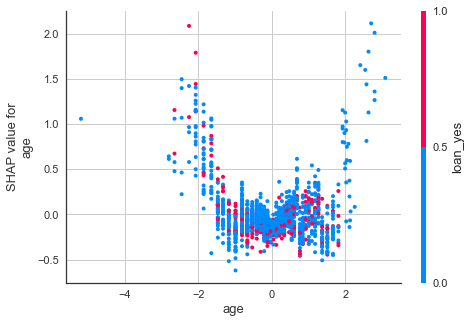

In [29]:
#feature wise correlation
interpret_model(lgbm, plot = 'correlation', feature='age')

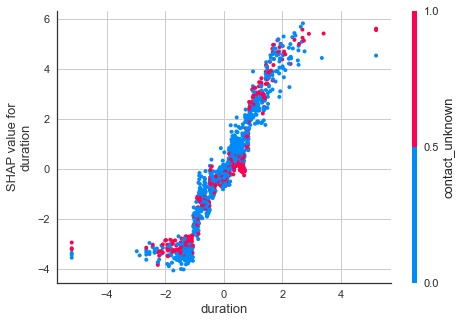

In [30]:
interpret_model(lgbm, plot = 'correlation', feature='duration')

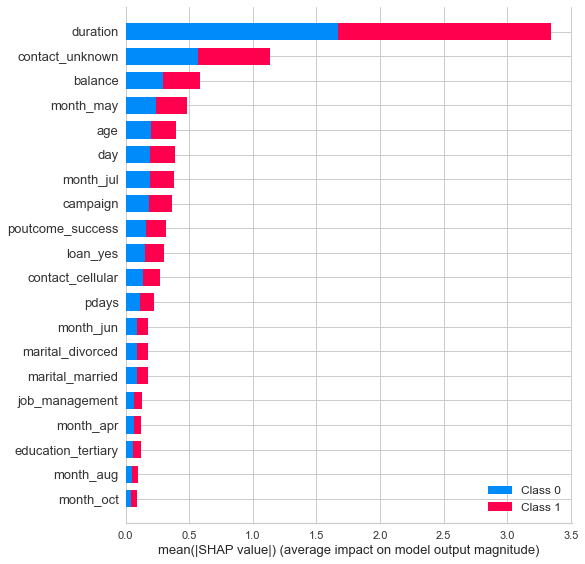

In [31]:
#model summary
interpret_model(lgbm, plot = 'summary')

In [32]:
#if you want to save the model

#save_model(lgbm, 'lgbm_model_1')